# Análisis iPhone

El objetivo del presente proyecto es realizar una comparativa de las diferentes versiones de iPhone, y cómo ha variado la percepción del público a través de los años

## Web scraping
En primer lugar se requirió obtener las características de todos los modelos de iPhone que han sido lanzados hasta febrero de 2018. Esta información fue obtenida a traves de scraping a la página web: http://socialcompare.com/en/comparison/apple-iphone-product-line-comparison

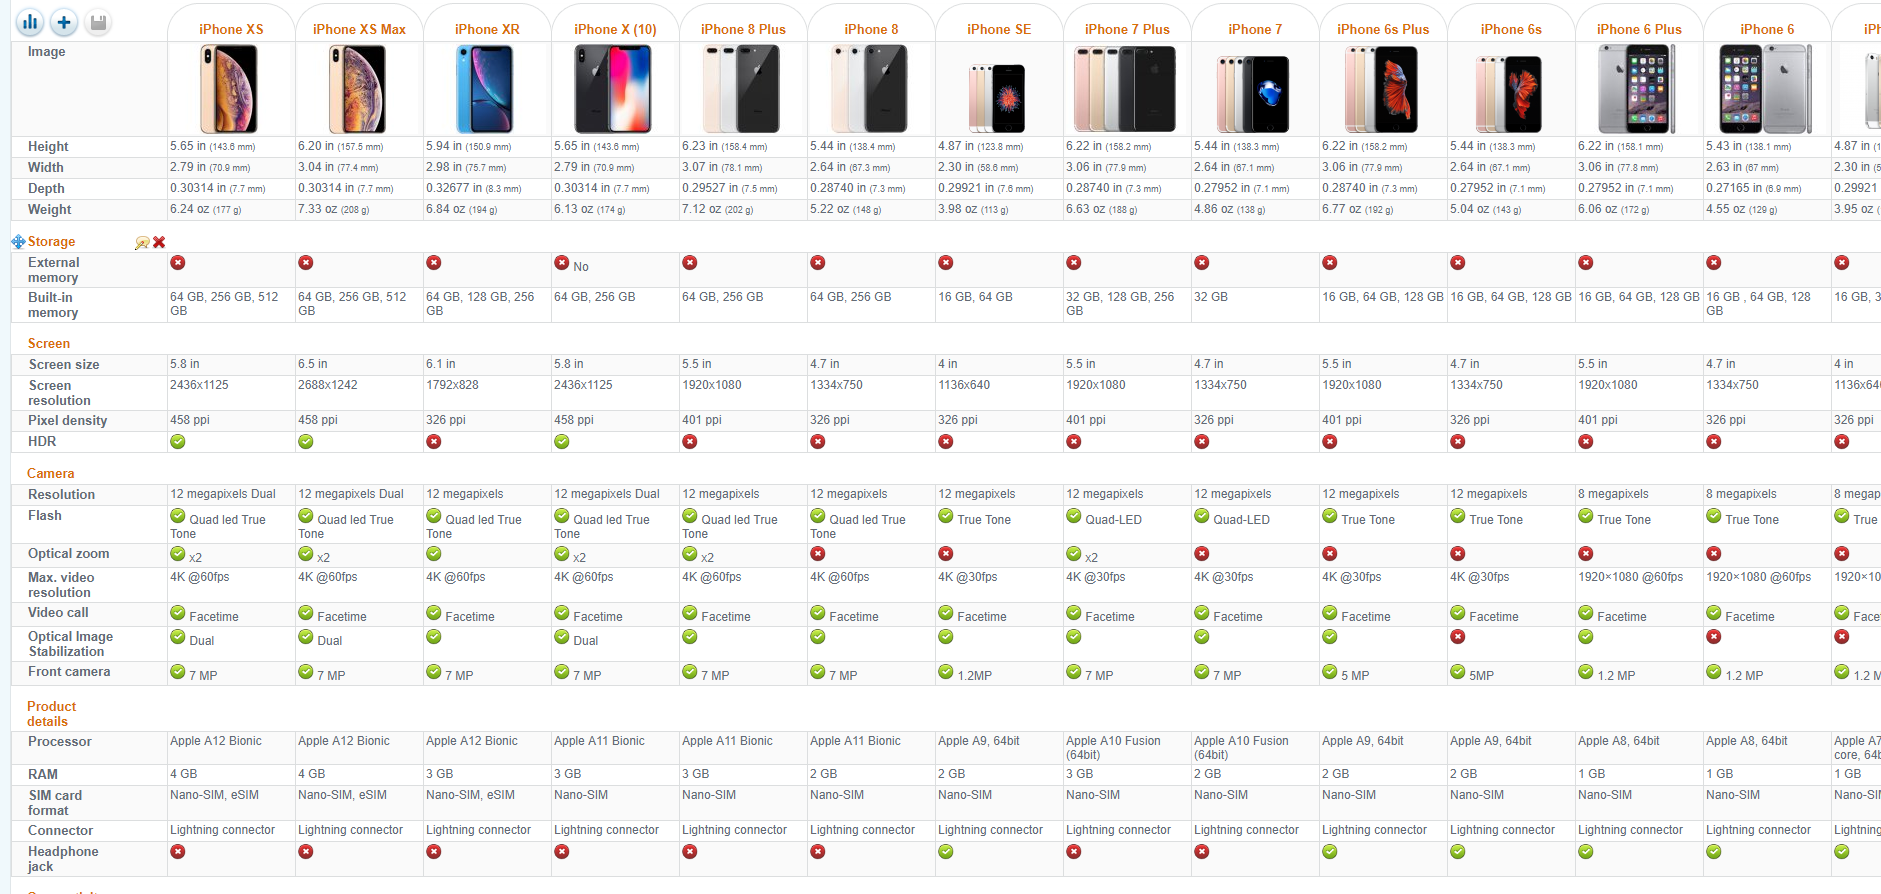

In [1]:
from IPython.display import Image
Image("img/web.png")

Mediante un spider de Scrapy se seleccionó las datos más relevantes y se almacenaron en un archivo csv. Posteriormente este archivo fue importado a un dataframe de Pandas.


In [2]:
import pandas
df_iphone = pandas.read_csv('../scrapy/iphone.csv')
df_iphone = df_iphone.sort_values('fecha')
df_iphone = df_iphone.reset_index(drop=True)
df_iphone

modelo  pulgadas_pantalla  resolucion_camara    ram  bateria  \
0       iPhone 3GS                3.5                  3  0.256     1219   
1         iPhone 4                3.5                  5  0.512     1420   
2        iPhone 4S                3.5                  8  1.000     1432   
3         iPhone 5                4.0                  8  1.000     1440   
4        iPhone 5C                4.0                  8  1.000     1507   
5        iPhone 5S                4.0                  8  1.000     1570   
6         iPhone 6                4.7                  8  1.000     1810   
7    iPhone 6 Plus                5.5                  8  1.000     2915   
8        iPhone 6s                4.7                 12  2.000     1715   
9   iPhone 6s Plus                5.5                 12  2.000     2750   
10       iPhone SE                4.0                 12  2.000     1624   
11   iPhone 7 Plus                5.5                 12  3.000     2900   
12        iPhone 7                4.7                 12  2.000     1960   
13        iPhone 8                4.7                 12  2.000     1821   
14   iPhone 8 Plus                5.5                 12  3.000     2675   
15   iPhone X (10)                5.8                 12  3.000     2716   
16   iPhone XS Max                6.5                 12  4.000     3174   
17       iPhone XS                5.8                 12  4.000     2658   
18       iPhone XR                6.1                 12  3.000     2942   

    almacenamiento       fecha  
0               32  2009-06-19  
1               32  2010-06-24  
2               64  2011-10-14  
3               64  2012-09-21  
4               32  2013-09-10  
5               64  2013-09-10  
6              128  2014-09-09  
7              128  2014-09-09  
8              128  2015-09-12  
9              128  2015-09-12  
10              64  2016-03-21  
11             256  2016-09-16  
12              32  2016-09-16  
13             256  2017-09-15  
14             256  2017-09-15  
15             256  2017-10-27  
16             512  2018-09-28  
17             512  2018-09-28  
18             256  2018-10-26

## Precios
Adicionalmente se obtuvo el precio de venta inicial de cada iPhone, ajustado a la inflación. A partir de un csv: https://www.reddit.com/r/dataisbeautiful/comments/9vak24/the_cost_of_each_iphone_at_launch_adjusted_for/

In [3]:
df_precio = pandas.read_csv('precio_iphone.csv')
df_precio


unit  year  price
0       iPhone 3GS  2009    700
1         iPhone 4  2010    692
2        iPhone 4S  2011    722
3         iPhone 5  2012    708
4        iPhone 5C  2013    584
5        iPhone 5S  2013    700
6         iPhone 6  2014    688
7    iPhone 6 Plus  2014    784
8        iPhone 6S  2015    689
9   iPhone 6S Plus  2015    783
10       iPhone SE  2016    395
11   iPhone 7 Plus  2016    804
12        iPhone 7  2016    679
13        iPhone 8  2017    715
14   iPhone 8 Plus  2017    809
15   iPhone X (10)  2017   1022
16   iPhone XS Max  2018   1099
17       iPhone XS  2018    999
18       iPhone XR  2018    749

In [4]:
df_iphone['precio'] = df_precio['price']
df_iphone


modelo  pulgadas_pantalla  resolucion_camara    ram  bateria  \
0       iPhone 3GS                3.5                  3  0.256     1219   
1         iPhone 4                3.5                  5  0.512     1420   
2        iPhone 4S                3.5                  8  1.000     1432   
3         iPhone 5                4.0                  8  1.000     1440   
4        iPhone 5C                4.0                  8  1.000     1507   
5        iPhone 5S                4.0                  8  1.000     1570   
6         iPhone 6                4.7                  8  1.000     1810   
7    iPhone 6 Plus                5.5                  8  1.000     2915   
8        iPhone 6s                4.7                 12  2.000     1715   
9   iPhone 6s Plus                5.5                 12  2.000     2750   
10       iPhone SE                4.0                 12  2.000     1624   
11   iPhone 7 Plus                5.5                 12  3.000     2900   
12        iPhone 7                4.7                 12  2.000     1960   
13        iPhone 8                4.7                 12  2.000     1821   
14   iPhone 8 Plus                5.5                 12  3.000     2675   
15   iPhone X (10)                5.8                 12  3.000     2716   
16   iPhone XS Max                6.5                 12  4.000     3174   
17       iPhone XS                5.8                 12  4.000     2658   
18       iPhone XR                6.1                 12  3.000     2942   

    almacenamiento       fecha  precio  
0               32  2009-06-19     700  
1               32  2010-06-24     692  
2               64  2011-10-14     722  
3               64  2012-09-21     708  
4               32  2013-09-10     584  
5               64  2013-09-10     700  
6              128  2014-09-09     688  
7              128  2014-09-09     784  
8              128  2015-09-12     689  
9              128  2015-09-12     783  
10              64  2016-03-21     395  
11             256  2016-09-16     804  
12              32  2016-09-16     679  
13             256  2017-09-15     715  
14             256  2017-09-15     809  
15             256  2017-10-27    1022  
16             512  2018-09-28    1099  
17             512  2018-09-28     999  
18             256  2018-10-26     749

(0, 1200)

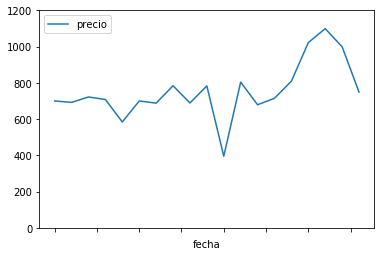

In [17]:
plot = df_iphone.plot(x='fecha',y='precio')
plot.set_ylim(0, 1200)


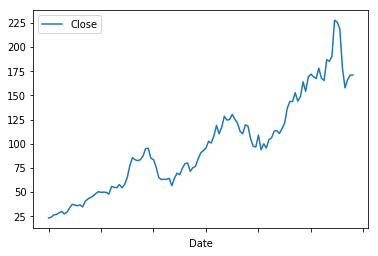

In [19]:
df_acciones = pandas.read_csv('AAPL.csv')
plot_acciones = df_acciones.plot(x='Date',y='Close')